# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [185]:
sinasc_raw = pd.read_csv('/content/drive/MyDrive/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [186]:
# OBS: Para esta tarefa, foi utilizado valor de referência 105 no lugar de -10.5, tendo em vista que o valor mínimo encontrado para 'numResAlt' é 85

sinasc_raw.loc[sinasc_raw['munResAlt'] > 105, 'Faixa Latitude'] = 'ACIMA'
sinasc_raw.loc[sinasc_raw['munResAlt'] <= 105, 'Faixa Latitude'] = 'ABAIXO'

sinasc_raw[['IDADEMAE', 'QTDFILVIVO', 'Faixa Latitude']].groupby('Faixa Latitude').agg([sum, np.mean, min, max, np.median, np.std, np.var])

IDADEMAE                                                 \
                    sum       mean min max median       std        var   
Faixa Latitude                                                           
ABAIXO           233348  26.269053  12  47   26.0  6.548599  42.884144   
ACIMA            471889  26.007992  11  53   25.0  6.305082  39.754056   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
Faixa Latitude                                                             
ABAIXO             9117.0  1.180806  0.0  12.0    1.0  1.239860  1.537253  
ACIMA             17709.0  0.998647  0.0  30.0    1.0  1.135178  1.288629

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [187]:
sinasc_raw.loc[sinasc_raw['munResArea'] > 3000, 'Faixa Área'] = 'ACIMA'
sinasc_raw.loc[sinasc_raw['munResArea'] <= 3000, 'Faixa Área'] = 'ABAIXO'

sinasc_raw[['ESTCIVMAE', 'KOTELCHUCK', 'Faixa Área']].groupby('Faixa Área').agg([sum, np.mean, min, max, np.median, np.std, np.var])

ESTCIVMAE                                                 \
                 sum      mean  min  max median       std       var   
Faixa Área                                                            
ABAIXO       13340.0  2.578774  1.0  9.0    2.0  1.582431  2.504089   
ACIMA        54643.0  2.537169  1.0  9.0    2.0  1.691778  2.862114   

           KOTELCHUCK                                               
                  sum      mean min max median       std       var  
Faixa Área                                                          
ABAIXO          24494  4.693236   1   9    5.0  1.456135  2.120328  
ACIMA          109968  5.042553   1   9    5.0  2.182659  4.763998

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [188]:
sinasc_raw.loc[sinasc_raw['munResAlt'] > 200, 'Faixa Latitude_2'] = 'ACIMA'
sinasc_raw.loc[sinasc_raw['munResAlt'] <= 200, 'Faixa Latitude_2'] = 'ABAIXO'

sinasc_raw[['PESO', 'GRAVIDEZ', 'Faixa Latitude_2']].groupby('Faixa Latitude_2').agg([sum, np.mean, min, max, np.median, np.std, np.var])

<ipython-input-188-0dc637e81c2d>:4: FutureWarning: ['GRAVIDEZ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sinasc_raw[['PESO', 'GRAVIDEZ', 'Faixa Latitude_2']].groupby('Faixa Latitude_2').agg([sum, np.mean, min, max, np.median, np.std, np.var])


PESO                                              \
                       sum         mean  min   max  median         std   
Faixa Latitude_2                                                         
ABAIXO            67662493  3248.787295  292  5480  3275.0  546.030364   
ACIMA             19991249  3224.395000  258  5985  3260.0  540.108413   

                                 
                            var  
Faixa Latitude_2                 
ABAIXO            298149.158826  
ACIMA             291717.097539

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [189]:
# dicionário de regiões imediatas

imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
    }

In [190]:
# criando coluna de regiões imediatas

sinasc_raw['Região imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [191]:
# criando grupos para cada região imediata

ariquemes = sinasc_raw[sinasc_raw['Região imediata'] == 'Ariquemes'].groupby('DTNASC')['IDADEMAE'].mean()
cacoal = sinasc_raw[sinasc_raw['Região imediata'] == 'Cacoal'].groupby('DTNASC')['IDADEMAE'].mean()
jaru = sinasc_raw[sinasc_raw['Região imediata'] == 'Jaru'].groupby('DTNASC')['IDADEMAE'].mean()
vilhena = sinasc_raw[sinasc_raw['Região imediata'] == 'Vilhena'].groupby('DTNASC')['IDADEMAE'].mean()
porto_velho = sinasc_raw[sinasc_raw['Região imediata'] == 'Porto Velho'].groupby('DTNASC')['IDADEMAE'].mean()
ji_parana = sinasc_raw[sinasc_raw['Região imediata'] == 'Ji-Paraná'].groupby('DTNASC')['IDADEMAE'].mean()

Text(0, 0.5, 'média idade mãe')

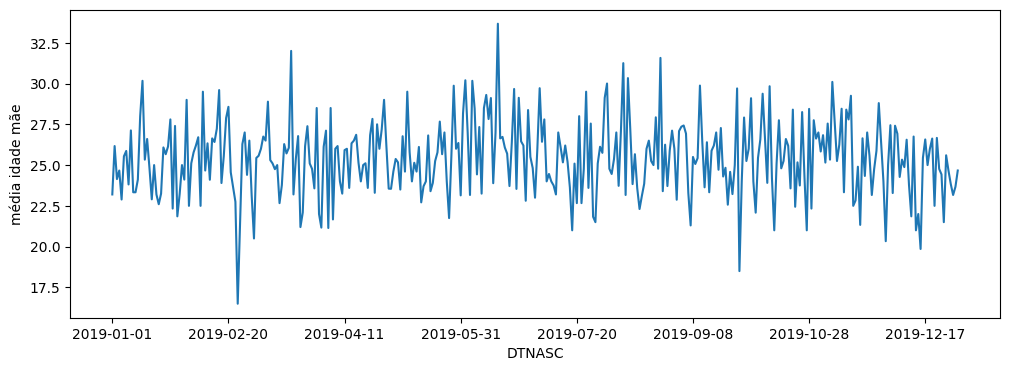

In [192]:
# plotando gráficos de linha para cada região imediata, referente à média da idade da mãe ao longo do tempo

ariquemes.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

Text(0, 0.5, 'média idade mãe')

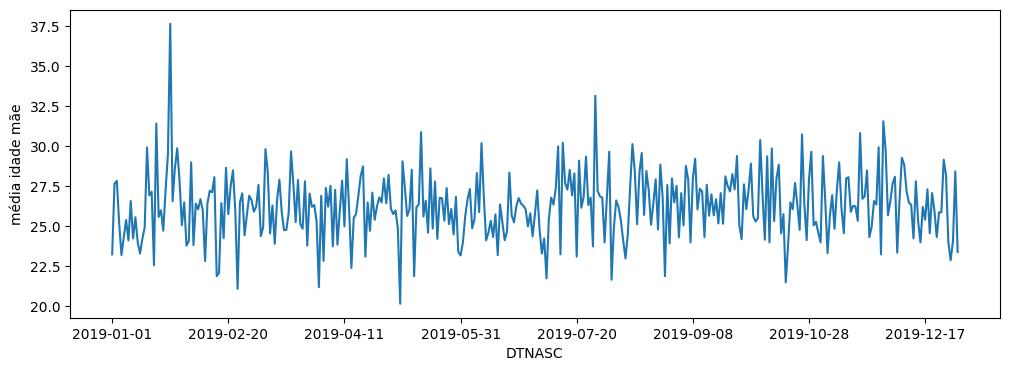

In [193]:
cacoal.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

Text(0, 0.5, 'média idade mãe')

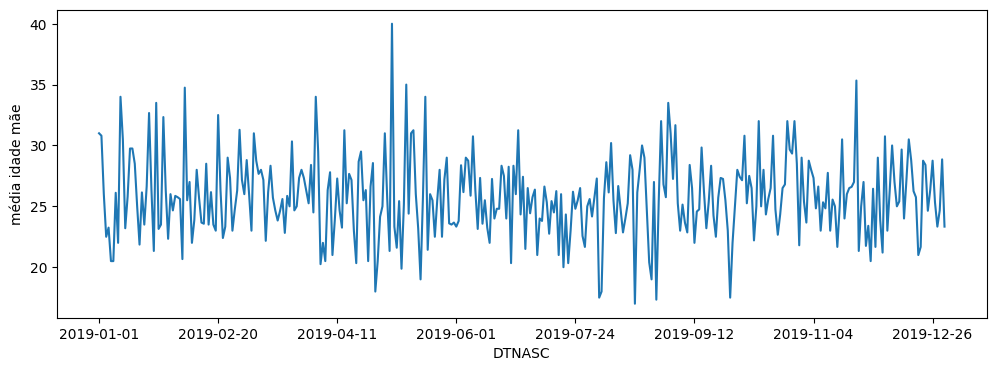

In [194]:
jaru.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

Text(0, 0.5, 'média idade mãe')

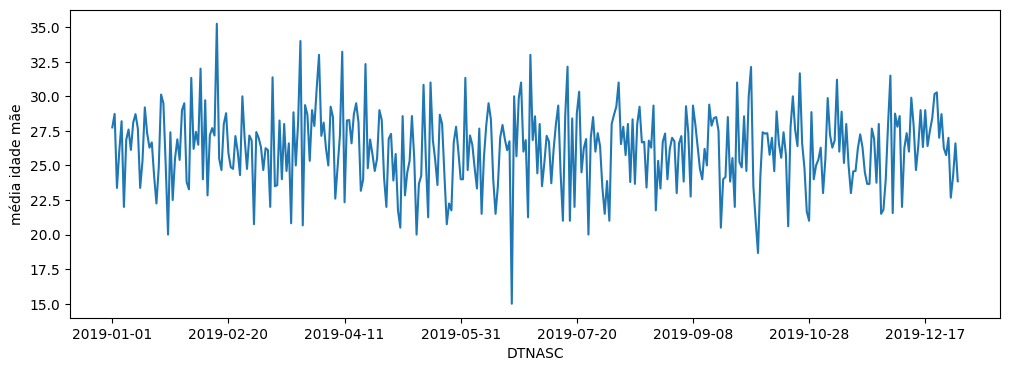

In [195]:
vilhena.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

Text(0, 0.5, 'média idade mãe')

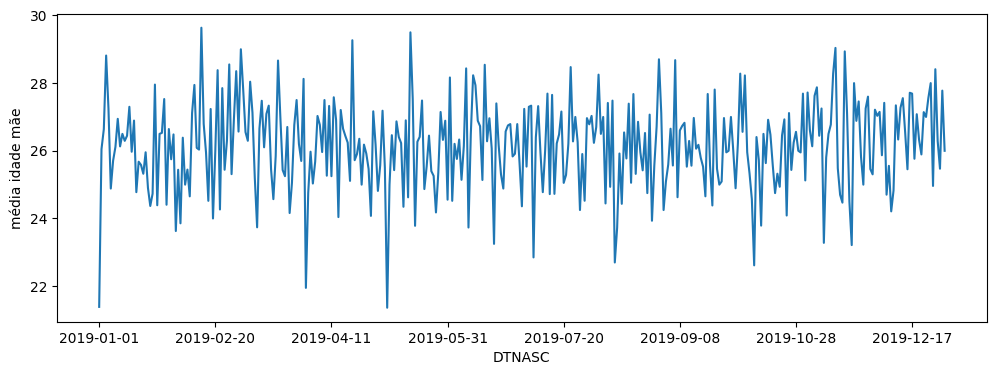

In [196]:
porto_velho.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

Text(0, 0.5, 'média idade mãe')

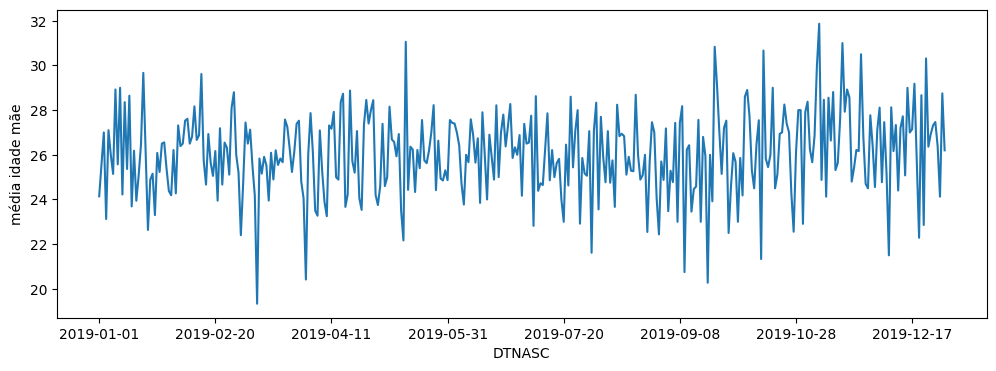

In [197]:
ji_parana.plot(figsize=[12,4])

plt.ylabel('média idade mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [198]:
sinasc_idh = sinasc_raw.set_index('munResNome')

In [199]:
IDH = {
    "Candeias do Jamari": "IDH Médio",
    "Guajará-Mirim": "IDH Médio",
    "Itapuã do Oeste": "IDH Médio",
    "Nova Mamoré": "IDH Baixo",
    "Porto Velho": "IDH Alto",
    "Alto Paraíso": "IDH Médio",
    "Ariquemes": "IDH Alto", 
    "Buritis": "IDH Médio",
    "Cacaulândia": "IDH Médio",
    "Campo Novo de Rondônia": "IDH Baixo",
    "Cujubim": "IDH Médio",
    "Monte Negro": "IDH Médio",
    "Rio Crespo": "IDH Médio",
    "Jaru": "IDH Médio",
    "Governador Jorge Teixeira": "IDH Baixo",
    "Machadinho D'Oeste": "IDH Baixo",
    "Theobroma": "IDH Baixo",
    "Vale do Anari": "IDH Baixo",
    "Alvorada D'Oeste": "IDH Médio",
    "Costa Marques": "IDH Médio",
    "Ji-Paraná": "IDH Alto",
    "Mirante da Serra": "IDH Médio",
    "Nova União": "IDH Baixo",
    "Ouro Preto do Oeste": "IDH Médio",
    "Presidente Médici": "IDH Médio",
    "São Francisco do Guaporé": "IDH Médio",
    "São Miguel do Guaporé": "IDH Médio",
    "Seringueiras": "IDH Baixo",
    "Teixeirópolis": "IDH Médio",
    "Urupá": "IDH Médio",
    "Vale do Paraíso": "IDH Médio",
    "Cacoal": "IDH Alto",
    "Alta Floresta D'Oeste": "IDH Médio",
    "Alto Alegre dos Parecis": "IDH Baixo",
    "Castanheiras": "IDH Médio",
    "Espigão D'Oeste": "IDH Médio",
    "Ministro Andreazza": "IDH Médio",
    "Nova Brasilândia D'Oeste": "IDH Médio",
    "Novo Horizonte do Oeste": "IDH Médio",
    "Parecis": "IDH Médio",
    "Pimenta Bueno": "IDH Médio",
    "Primavera de Rondônia": "IDH Médio",
    "Rolim de Moura": "IDH Alto",
    "Santa Luzia D'Oeste": "IDH Médio",
    "São Felipe D'Oeste": "IDH Médio",
    "Vilhena": "IDH Alto",
    "Cabixi": "IDH Médio",
    "Cerejeiras": "IDH Médio",
    "Chupinguaia": "IDH Médio",
    "Colorado do Oeste": "IDH Médio",
    "Corumbiara": "IDH Médio",
    "Pimenteiras do Oeste": "IDH Médio"
    }

In [200]:
sinasc_idh.groupby(IDH).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa Latitude,Faixa Área,Faixa Latitude_2,Região imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
IDH Alto,16239,16183,16239,16239,16239,16031,16017,14959,15085,14826,...,16239,16239,16239,16239,16239,16239,16239,16239,16239,16239
IDH Baixo,1826,1813,1826,1826,1826,1802,1807,1505,1734,1684,...,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
IDH Médio,8962,8916,8962,8962,8962,8877,8891,7656,8635,8419,...,8962,8962,8962,8962,8962,8962,8962,8962,8962,8962


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [201]:
sinasc_ifdm = sinasc_raw.set_index('munResNome')

In [202]:
IFDM = {
    "Candeias do Jamari": "Desenvolvimento Moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento Moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Ariquemes": "Desenvolvimento Moderado", 
    "Buritis": "Desenvolvimento Moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento Moderado",
    "Rio Crespo": "Desenvolvimento Moderado",
    "Jaru": "Desenvolvimento Moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento Moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento Moderado",
    "Presidente Médici": "Desenvolvimento Moderado",
    "São Francisco do Guaporé": "Desenvolvimento Moderado",
    "São Miguel do Guaporé": "Desenvolvimento Moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento Moderado",
    "Urupá": "Desenvolvimento Moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento Moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento Moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento Moderado",
    "Primavera de Rondônia": "Desenvolvimento Moderado",
    "Rolim de Moura": "Desenvolvimento Moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento Moderado",
    "São Felipe D'Oeste": "Desenvolvimento Moderado",
    "Vilhena": "Desenvolvimento Moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento regular",
    "Chupinguaia": "Desenvolvimento Moderado",
    "Colorado do Oeste": "Desenvolvimento Moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento Moderado"
    }

In [203]:
sinasc_ifdm.groupby(IFDM).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa Latitude,Faixa Área,Faixa Latitude_2,Região imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
Desenvolvimento Moderado,21709,21635,21709,21709,21709,21455,21438,19432,20281,19826,...,21709,21709,21709,21709,21709,21709,21709,21709,21709,21709
Desenvolvimento regular,5318,5277,5318,5318,5318,5255,5277,4688,5173,5103,...,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [204]:
sinasc_pib = sinasc_raw.set_index('munResNome')

In [205]:
PIB = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
    }

In [206]:
sinasc_pib.groupby(PIB).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,Faixa Latitude,Faixa Área,Faixa Latitude_2,Região imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
Acima de 1 Bilhão,17736,17678,17736,17736,17736,17520,17508,15942,16569,16301,...,17736,17736,17736,17736,17736,17736,17736,17736,17736,17736
Acima de 100 Milhões,1952,1943,1952,1952,1952,1926,1934,1738,1922,1916,...,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952
Acima de 200 Milhões,724,722,724,724,724,708,705,686,677,649,...,724,724,724,724,724,724,724,724,724,724
Acima de 300 Milhões,1880,1874,1880,1880,1880,1858,1862,1723,1860,1852,...,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880
Acima de 500 Milhões,4304,4265,4304,4304,4304,4272,4277,3690,4001,3787,...,4304,4304,4304,4304,4304,4304,4304,4304,4304,4304
Até 100 Milhões,431,430,431,431,431,426,429,341,425,424,...,431,431,431,431,431,431,431,431,431,431


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [207]:
sinasc_pib[['IDADEMAE']].groupby(PIB).agg(np.mean)

,IDADEMAE
munResNome,
Acima de 1 Bilhão,26.265562
Acima de 100 Milhões,25.662910
Acima de 200 Milhões,25.323204
Acima de 300 Milhões,25.833511
Acima de 500 Milhões,25.782528
Até 100 Milhões,26.515081


In [208]:
sinasc_pib[['IDADEMAE']].groupby(PIB).agg(np.median)

,IDADEMAE
munResNome,
Acima de 1 Bilhão,26.0
Acima de 100 Milhões,25.0
Acima de 200 Milhões,25.0
Acima de 300 Milhões,25.0
Acima de 500 Milhões,25.0
Até 100 Milhões,26.0


*A média e a mediana indicam que as mães residentes em cidades de maior PIB do Estado de Rondônia "dão luz" com idade maior que a das residentes em cidades de menor PIB*